In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [5]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [6]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x-x.min()) /(x.max()-x.min()))

In [7]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [8]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [10]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A', 'B', 'C', 'D'])

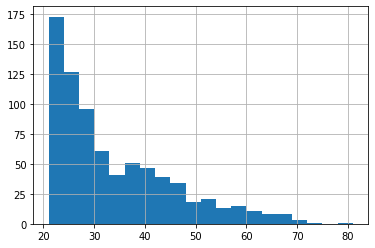

In [12]:
diabetes['Age'].hist(bins=20)

In [14]:
age_bucket = tf.feature_column.bucketized_column(age, boundaries = [20,30,40,50,60,70,80])

In [15]:
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree, assigned_group, age_bucket]

In [18]:
x_data = diabetes.drop('Class', axis=1)

In [19]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [23]:
labels = diabetes['Class']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size = 0.3, random_state = 101)

In [26]:
X_train.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
711,0.294118,0.633166,0.639344,0.272727,0.026005,0.441133,0.154142,40,D
58,0.000000,0.733668,0.672131,0.000000,0.000000,0.603577,0.727156,44,D
216,0.294118,0.547739,0.508197,0.414141,0.152482,0.533532,0.186166,25,B
168,0.235294,0.552764,0.540984,0.000000,0.000000,0.475410,0.167805,29,B
658,0.647059,0.638191,0.868852,0.000000,0.000000,0.581222,0.047822,51,A


In [28]:
X_test.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,47,C
748,0.176471,0.939698,0.573770,0.222222,0.236407,0.542474,0.140905,36,B
42,0.411765,0.532663,0.754098,0.181818,0.000000,0.338301,0.067037,48,A
485,0.000000,0.678392,0.557377,0.424242,0.295508,0.630402,0.122545,24,C
543,0.235294,0.422111,0.737705,0.232323,0.066194,0.588674,0.034586,25,C


In [29]:
input_func = tf.estimator.inputs.pandas_input_fn(x = X_train, y = y_train, batch_size = 10, num_epochs=1000, shuffle = True)

In [31]:
model = tf.estimator.LinearClassifier(feat_cols, n_classes = 2)

W0904 12:53:39.909770 140533966628672 estimator.py:1811] Using temporary folder as model directory: /tmp/tmpnwu4_m3v


In [32]:
model.train(input_fn=input_func, steps = 1000)

W0904 12:54:01.739871 140533966628672 deprecation.py:323] From /home/kazzastic/anaconda3/lib/python3.7/site-packages/tensorflow/python/training/training_util.py:236: Variable.initialized_value (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
W0904 12:54:01.822013 140533966628672 deprecation.py:323] From /home/kazzastic/anaconda3/lib/python3.7/site-packages/tensorflow_estimator/python/estimator/inputs/queues/feeding_queue_runner.py:62: QueueRunner.__init__ (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
W0904 12:54:01.825547 140533966628672 deprecation.py:323] From /home/kazzastic/anaconda3/lib/python3.7/site-packages/tensorflow_estimator/python/estimator

In [33]:
test_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test, y = y_test, batch_size = 10, num_epochs=1, shuffle = False)

In [34]:
results = model.evaluate(test_input_func)

W0904 12:56:22.641992 140533966628672 deprecation.py:323] From /home/kazzastic/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/metrics_impl.py:2027: div (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
W0904 12:56:22.989187 140533966628672 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.
W0904 12:56:23.027703 140533966628672 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.
W0904 12:56:23.567018 140533966628672 deprecation.py:323] From /home/kazzastic/anaconda3/lib/python3.7/site-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file A

In [35]:
results

{'accuracy': 0.7316017,
 'accuracy_baseline': 0.64935064,
 'auc': 0.79905343,
 'auc_precision_recall': 0.6447619,
 'average_loss': 0.52630055,
 'label/mean': 0.35064936,
 'loss': 5.065643,
 'precision': 0.6557377,
 'prediction/mean': 0.3512097,
 'recall': 0.49382716,
 'global_step': 1000}

In [36]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test, batch_size = 10, num_epochs=1, shuffle = False)

In [37]:
predictions = model.predict(pred_input_func)

In [38]:
my_pred = list(predictions)

# DNN Classifier

In [45]:
dnn_model = tf.estimator.DNNClassifier(hidden_units = [10,10,10], feature_columns = feat_cols, n_classes=2)

W0904 13:01:52.960924 140533966628672 estimator.py:1811] Using temporary folder as model directory: /tmp/tmp6atyvmw_


In [46]:
embedded_group_column = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [48]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,embedded_group_column, age_bucket]

In [49]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [50]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

W0904 13:08:01.913470 140533966628672 estimator.py:1811] Using temporary folder as model directory: /tmp/tmprc0zut2e


In [51]:
dnn_model.train(input_fn=input_func,steps=1000)

W0904 13:08:09.181167 140533966628672 deprecation.py:506] From /home/kazzastic/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0904 13:08:09.396230 140533966628672 deprecation.py:323] From /home/kazzastic/anaconda3/lib/python3.7/site-packages/tensorflow/python/feature_column/feature_column_v2.py:3038: VocabularyListCategoricalColumn._num_buckets (from tensorflow.python.feature_column.feature_column_v2) is deprecated and will be removed in a future version.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
W0904 13:08:10.235826 140533966628672 deprecation.py:506] From /home/kazzastic/anaconda3/lib/python3.7/site-packages/tensorflow/p

In [52]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      y=y_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [53]:
dnn_model.evaluate(eval_input_func)

W0904 13:08:29.626845 140533966628672 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.
W0904 13:08:29.665500 140533966628672 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.


{'accuracy': 0.77056277,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8352674,
 'auc_precision_recall': 0.71102417,
 'average_loss': 0.47700977,
 'label/mean': 0.35064936,
 'loss': 4.591219,
 'precision': 0.65909094,
 'prediction/mean': 0.38663927,
 'recall': 0.7160494,
 'global_step': 1000}